In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [2]:
train_data_path = "/kaggle/input/spaceship-titanic/train.csv"
test_data_path = "/kaggle/input/spaceship-titanic/test.csv"

In [3]:
train_data = pd.read_csv(train_data_path)
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Visualize and Preprocess Data

In [5]:
preprocess_data = train_data.copy()
preprocess_data = preprocess_data.drop(["PassengerId", "Name"], axis=1)
preprocess_data

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [6]:
#”Cabin”の種類数の確認
len(preprocess_data["Cabin"].unique())

6561

In [7]:
#"Cabin"のデータは種類が多すぎるので一旦削除
preprocess_data = preprocess_data.drop(["Cabin"], axis=1)
preprocess_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


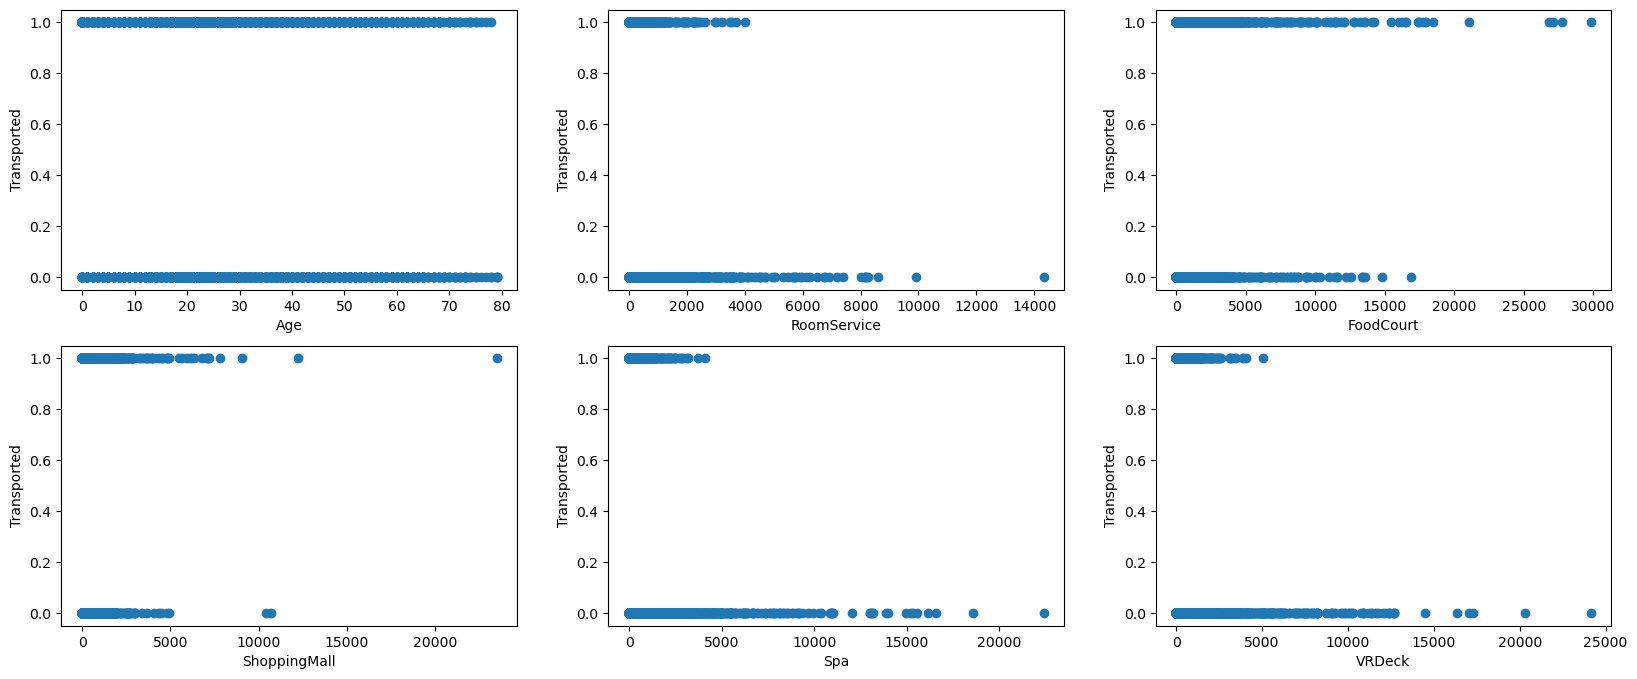

In [8]:
#量的変数の可視化
quant_columns = [quant_col for quant_col in preprocess_data.describe().columns.values]
fig = plt.figure(figsize=(20,8))
for i in range(len(quant_columns)):
    fig.add_subplot(2,3, i+1)
    x_label = quant_columns[i]
    plt.scatter(preprocess_data[x_label], preprocess_data["Transported"] * 1)
    plt.xlabel(x_label)
    plt.ylabel("Transported")
plt.show()

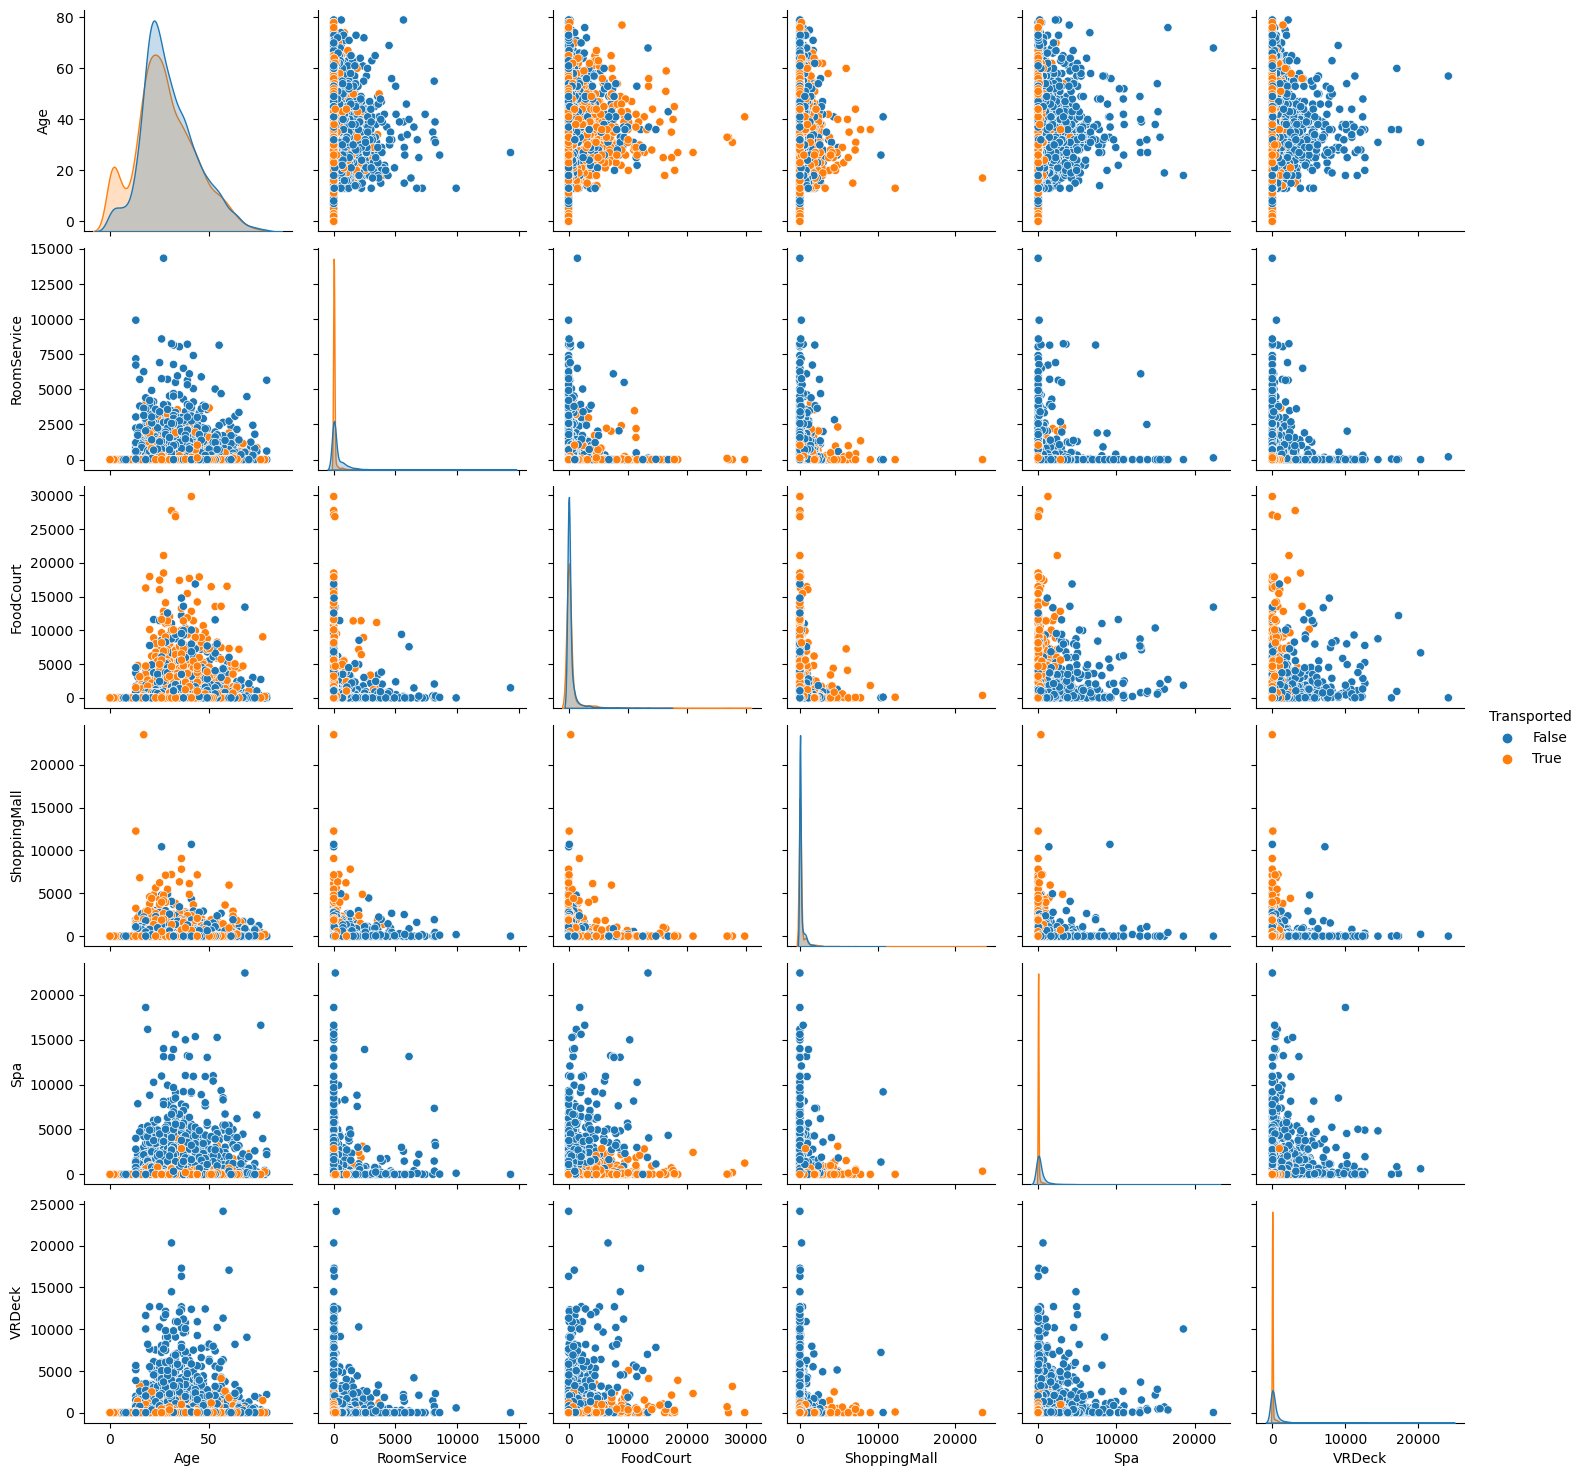

In [11]:
sns.pairplot(
    preprocess_data,
    x_vars=quant_columns,
    y_vars=quant_columns,
    hue="Transported"
)
plt.show()

In [12]:
#カテゴリ変数
categorical_columns = [col for col in preprocess_data.columns if col not in quant_columns]
categorical_columns.remove("Transported")
print(categorical_columns)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


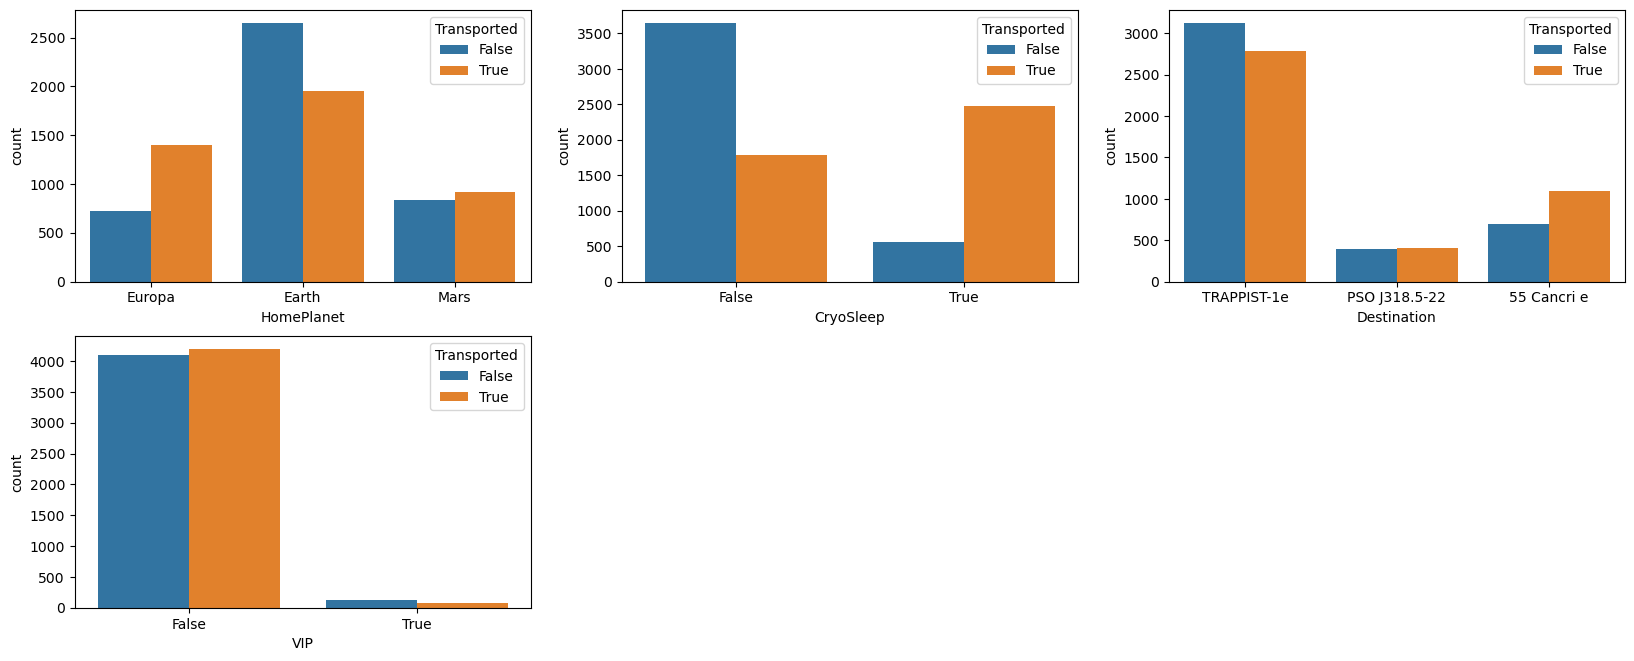

In [13]:
fig = plt.figure(figsize=(20,12))
for i in range(len(categorical_columns)):
    fig.add_subplot(3,3, i+1)
    x_label = categorical_columns[i]
    sns.countplot(data=preprocess_data, x=x_label,hue="Transported")
fig.show()

In [15]:
#NullがあるColumnを抽出し、件数表示
null_col_list = {}
for idx, count_val in enumerate(preprocess_data.isnull().sum()):
    if count_val !=0:
        dict_key = preprocess_data.isnull().sum().index[idx]
        null_col_list[dict_key] = count_val
print(f"null_col_list:\n{null_col_list}")

null_col_list:
{'HomePlanet': 201, 'CryoSleep': 217, 'Destination': 182, 'Age': 179, 'VIP': 203, 'RoomService': 181, 'FoodCourt': 183, 'ShoppingMall': 208, 'Spa': 183, 'VRDeck': 188}


In [16]:
#量的変数は平均値で、カテゴリ変数は最頻値でNullを置換
for key, val in null_col_list.items():
    if key in quant_columns:
        preprocess_data[key] = preprocess_data[key].fillna(preprocess_data[key].mean())
    elif key in categorical_columns:
        preprocess_data[key] = preprocess_data[key].fillna(preprocess_data[key].mode()[0])
    else:
        pass

In [19]:
preprocess_data.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Summary of Preprocessing Data

In [22]:
#NullがあるColumnを抽出し、リターン
def get_null_col_dict(df):
    null_col_list = {}
    for idx, count_val in enumerate(df.isnull().sum()):
        if count_val !=0:
            dict_key = df.isnull().sum().index[idx]
            null_col_list[dict_key] = count_val
    return null_col_list

In [23]:
#量的変数は平均値で、カテゴリ変数は最頻値でNullを置換
def replace_null(df, null_col_list, quant_columns, categorical_columns):
    for key, val in null_col_list.items():
        if key in quant_columns:
            df[key] = df[key].fillna(df[key].mean())
        elif key in categorical_columns:
            df[key] = df[key].fillna(df[key].mode()[0])
        else:
            pass
    return df

In [11]:
def preprocess_df(df):
    df = df.drop(["PassengerId", "Name", "Cabin"], axis=1)
    if "Transported" in df.columns.values:
        df = df.drop(["Transported"], axis=1)
    #量的変数のカラム
    quant_columns = [quant_col for quant_col in df.describe().columns.values]
    #カテゴリ変数のカラム
    categorical_columns = [col for col in df.columns if col not in quant_columns]
    null_col = get_null_col_dict(df)
    df = replace_null(df, null_col, quant_columns, categorical_columns)
    
    X = pd.get_dummies(df, drop_first=True)
    return X

In [42]:
#scalerを量的変数を使ってfit
def fit_scaler(quant_df, scaler):
    #量的変数のカラム
    #quant_columns = [quant_col for quant_col in df.describe().columns.values]
    
    #scaler.fit(df[quant_columns])
    scaler.fit(quant_df)
    
    return scaler

In [43]:
#fit済みのscalerを使って量的変数のカラムを標準化
def scale_quant_columns(quant_df, scaler):
    #量的変数のカラム
    #quant_columns = [quant_col for quant_col in df.describe().columns.values]
    
    #df[quant_columns] = scaler.transform(df[quant_columns])
    quant_df = scaler.transform(quant_df)
    
    #return df[quant_columns]
    return quant_df

In [44]:
def preprocess_df_include_Cabin(df, scale_df="False"):
    df = df.drop(["PassengerId", "Name"], axis=1)
    
    #正解ラベル”Transported”がカラムに存在する場合は削除
    if "Transported" in df.columns.values:
        df = df.drop(["Transported"], axis=1)
    
    #量的変数のカラム
    quant_columns = [quant_col for quant_col in df.describe().columns.values]
    
    #カテゴリ変数のカラム
    categorical_columns = [col for col in df.columns if col not in quant_columns]
    
    #Add Preprocess of "Cabin"
    df['Cabin'].fillna('None/None/None', inplace=True)
    df['Deck'] = df['Cabin'].apply(lambda x: str.split(x, "/")[0])
    df['Side'] = df['Cabin'].apply(lambda x: str.split(x, "/")[2])
    #元の”Cabin”は削除
    df = df.drop(["Cabin"], axis=1)
    
    null_col = get_null_col_dict(df)
    df = replace_null(df, null_col, quant_columns, categorical_columns)
    
    if scale_df == "True":
        standard_scaler = StandardScaler()
        print(f"df[quant_columns]:\n{df[quant_columns]}")
        standard_scaler = fit_scaler(df[quant_columns], standard_scaler)
        df[quant_columns] = scale_quant_columns(df[quant_columns], standard_scaler)
        print(f"df[quant_columns]_after_scaled:\n{df[quant_columns]}")
    
    
    X = pd.get_dummies(df, drop_first=True)
    return X

## Training

Logistic回帰や決定木を使って推論

In [38]:
train_df = train_data.copy()
X = preprocess_df(train_df)
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,1,0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,0,0,0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0


In [68]:
train_df = train_data.copy()
X_after = preprocess_df_include_Cabin(train_df)
X_after

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,1,0,...,0,0,0,0,0,0,0,0,1,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
y = train_df["Transported"]
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [70]:
y_after = train_df["Transported"]
y_after

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [40]:
#複数のモデルを比較する場合も考慮してrandom_stateを指定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
X_after_train, X_after_test, y_after_train, y_after_test =  train_test_split(X_after, y_after, test_size=0.2, random_state=0)

In [41]:
forest = RandomForestClassifier(criterion="gini", n_estimators=500, random_state=1, n_jobs=2)

In [42]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=2, random_state=1)

In [43]:
print("score=", forest.score(X_test, y_test))

score= 0.7814836112708453


## Parameter Tuning

In [54]:
score_list = []
estimators_list = [25, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]
for estimator in estimators_list:
    forest_model = RandomForestClassifier(criterion="gini", n_estimators=estimator, random_state=1, n_jobs=2)
    forest_model.fit(X_train, y_train)
    score = forest_model.score(X_test, y_test)
    print(f"estimator={estimator}, score={score}")
    score_list.append(score)

estimator=25, score=0.7740080506037953
estimator=50, score=0.7791834387579069
estimator=100, score=0.7786083956296722
estimator=200, score=0.78205865439908
estimator=300, score=0.7797584818861415
estimator=400, score=0.78205865439908
estimator=500, score=0.7814836112708453
estimator=600, score=0.7814836112708453
estimator=700, score=0.78205865439908
estimator=800, score=0.7809085681426107
estimator=900, score=0.7814836112708453
estimator=1000, score=0.7826336975273146
estimator=2000, score=0.7757331799884991
estimator=3000, score=0.7797584818861415
estimator=4000, score=0.780333525014376
estimator=5000, score=0.7809085681426107


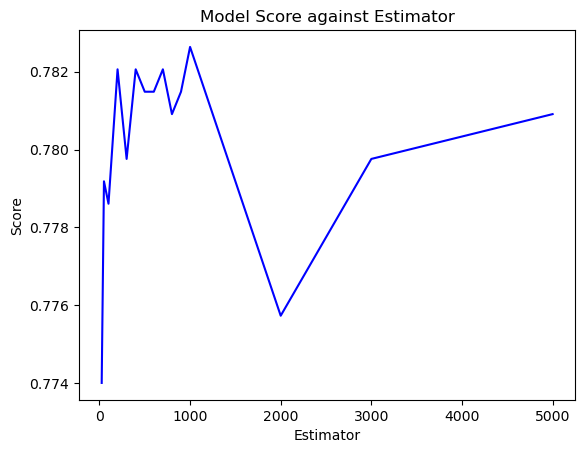

In [55]:
plt.plot(estimators_list,score_list,linestyle='solid',color='blue')
plt.title("Model Score against Estimator")
plt.xlabel("Estimator")
plt.ylabel("Score")
plt.show()

In [72]:
forest = RandomForestClassifier(criterion="gini", n_estimators=1000, random_state=1, n_jobs=2)

In [57]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=1)

In [75]:
forest_after = RandomForestClassifier(criterion="gini", n_estimators=1000, random_state=1, n_jobs=2)
forest_after.fit(X_after_train, y_after_train)

RandomForestClassifier(n_estimators=1000, n_jobs=2, random_state=1)

In [76]:
print("score=", forest_after.score(X_after_test, y_after_test))

score= 0.7947096032202415


## Try Other Models

#### Linear SVC

In [53]:
X_for_svc = preprocess_df_include_Cabin(train_data.copy())
X_for_svc

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_None,Deck_T,Side_P,Side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,1,0,...,0,0,0,0,0,0,0,0,1,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [54]:
y_for_svc = train_data["Transported"]
X_train_for_svc,X_test_for_svc, y_train_for_svc, y_test_for_svc = train_test_split(X_for_svc, y_for_svc, test_size=0.2, random_state=0)

In [55]:
standard_scaler = StandardScaler()
#量的変数のカラム
quant_columns = [quant_col for quant_col in X_for_svc.describe().columns.values]
X_train_for_svc[quant_columns] = standard_scaler.fit_transform(X_train_for_svc[quant_columns])
X_test_for_svc[quant_columns] = standard_scaler.transform(X_test_for_svc[quant_columns])

In [59]:
"""Linear SVCの計算：
score = 0.7855089131684876。ただし、ConvergenceWarning発生
"""
clf_svc = LinearSVC(random_state=0, max_iter=5000)
clf_svc.fit(X_train_for_svc, y_train_for_svc)
score = clf_svc.score(X_test_for_svc, y_test_for_svc)
print(f"score = {score}")

score = 0.7855089131684876


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Predict Data

In [58]:
submission_df = pd.read_csv(test_data_path)
submission_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [59]:
X_test_data = preprocess_df(submission_df)

In [77]:
X_after_test_data = preprocess_df_include_Cabin(submission_df)

In [60]:
X_test_data

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,True,27.000000,False,0.0,0.0,0.0,0.0,0.0,0,0,0,1
1,False,19.000000,False,0.0,9.0,0.0,2823.0,0.0,0,0,0,1
2,True,31.000000,False,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,False,38.000000,False,0.0,6652.0,0.0,181.0,585.0,1,0,0,1
4,False,20.000000,False,10.0,0.0,635.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,True,34.000000,False,0.0,0.0,0.0,0.0,0.0,0,0,0,1
4273,False,42.000000,False,0.0,847.0,17.0,10.0,144.0,0,0,0,1
4274,True,28.658146,False,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4275,False,28.658146,False,0.0,2680.0,0.0,0.0,523.0,1,0,0,1


In [61]:
y = forest.predict(X_test_data)

In [78]:
y = forest_after.predict(X_after_test_data)

In [ ]:
# # Add for testing LinearSVC
# X_test_data_for_svc = X_after_test_data.copy()
# #量的変数のカラム
# quant_columns_for_X_test = [quant_col for quant_col in X_test_data_for_svc.describe().columns.values]
# X_test_data_for_svc[quant_columns_for_X_test] = standard_scaler.transform(X_after_test_data[quant_columns_for_X_test])
# y = clf_svc.predict(X_test_data_for_svc)

In [79]:
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [80]:
submission["Transported"] = y
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [81]:
submission.to_csv("submission.csv", index=False)